In [1]:
from qiskit_gym.envs import LinearFunctionGym, CliffordGym, PermutationGym, LinearFunctionNoisyGym
from qiskit_gym.rl import RLSynthesis, PPOConfig, AlphaZeroConfig, BasicPolicyConfig


from qiskit import QuantumCircuit
from qiskit.transpiler import CouplingMap
import numpy as np

ModuleNotFoundError: No module named 'qiskit.qobj'

# Training RL

In [2]:

cmap_6_line = CouplingMap.from_ring(5, bidirectional=True)
env = LinearFunctionNoisyGym.from_coupling_map(cmap_6_line, basis_gates=["CX", 'SWAP'])
env2 = LinearFunctionGym.from_coupling_map(cmap_6_line, basis_gates= ['CX', 'SWAP'])

noisy_rl = RLSynthesis(env, PPOConfig(), BasicPolicyConfig())
noisy_rl.learn(initial_difficulty=3, num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

noiseless_rl = RLSynthesis(env2, PPOConfig(), BasicPolicyConfig())
noiseless_rl.learn(num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

2025-12-09 13:04:18.398 | INFO     | twisterl.rl.algorithm:learn:176 - (3/0) {'successes': {'ppo_deterministic': 0.03999999910593033, 'ppo_10': 0.07000000029802322}, 'rewards': {'ppo_deterministic': -1.0845625400543213, 'ppo_10': -0.4731093943119049}, 'difficulty': 3, 'success': 0.03999999910593033, 'reward': -1.0845625400543213} | {'to_rust': 0.006989209, 'eval_ppo_deterministic': 0.002861959, 'eval_ppo_10': 0.020679958, 'collect': 0.024176708, 'data_to_torch': 0.043957417, 'train': 0.545862625, 'total': 0.646048458}
2025-12-09 13:04:18.429 | INFO     | twisterl.rl.algorithm:learn:196 - (3/0) Improved, saved checkpoint!
2025-12-09 13:04:18.962 | INFO     | twisterl.rl.algorithm:learn:176 - (3/1) {'successes': {'ppo_deterministic': 0.019999999552965164, 'ppo_10': 0.10000000149011612}, 'rewards': {'ppo_deterministic': -1.3310742378234863, 'ppo_10': -0.4278554618358612}, 'difficulty': 3, 'success': 0.019999999552965164, 'reward': -1.3310742378234863} | {'to_rust': 0.019750959, 'eval_ppo_

In [3]:
noisy_rl.env.config['gateset']

[('CX', (0, 1)),
 ('CX', (0, 4)),
 ('CX', (1, 0)),
 ('CX', (1, 2)),
 ('CX', (2, 1)),
 ('CX', (2, 3)),
 ('CX', (3, 2)),
 ('CX', (3, 4)),
 ('CX', (4, 0)),
 ('CX', (4, 3)),
 ('SWAP', (0, 1)),
 ('SWAP', (0, 4)),
 ('SWAP', (1, 0)),
 ('SWAP', (1, 2)),
 ('SWAP', (2, 1)),
 ('SWAP', (2, 3)),
 ('SWAP', (3, 2)),
 ('SWAP', (3, 4)),
 ('SWAP', (4, 0)),
 ('SWAP', (4, 3))]

# Generating Random Circuit

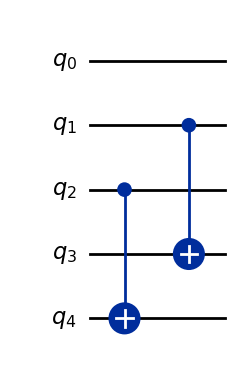

In [8]:
#generating a random quantum circuit

import random

def generate_random_circ(num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i in range(random.randrange(2, 3)):
        q1 = random.randint(0, num_qubits - 1)
        q2 = q1 + (2 * random.randint(-1, 1)) 
        if q1 == q2 :
            q2 = q1 + 1
        if  q2 >= num_qubits:
            q2 = q1 - 2
        qc.cx(q1,q2)

    return qc

qc = generate_random_circ(5)
qc.draw(fold=-1, output="mpl")


# Testing No Noise Added Prior

In [9]:
print('Noisy Synthesis')
qc_lf_output = noisy_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)

Noisy Synthesis


AttributeError: 'NoneType' object has no attribute 'draw'

Noiseless Synthesis


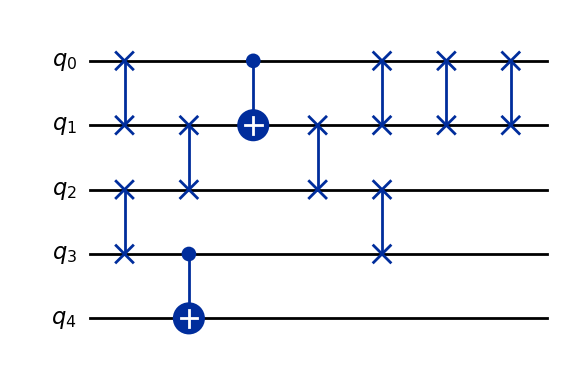

In [10]:
print('Noiseless Synthesis')
qc_lf_output = noiseless_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)

## Testing Noise Crowded on 0,1 Edge

In [4]:
cmap_6_line = CouplingMap.from_ring(5, bidirectional=True)
env = LinearFunctionNoisyGym.from_coupling_map(cmap_6_line, basis_gates=["CX", 'SWAP'])
env2 = LinearFunctionGym.from_coupling_map(cmap_6_line, basis_gates= ['CX', 'SWAP'])

noisy_rl = RLSynthesis(env, PPOConfig(), BasicPolicyConfig())
noisy_rl.learn(initial_difficulty=3, num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

noiseless_rl = RLSynthesis(env2, PPOConfig(), BasicPolicyConfig())
noiseless_rl.learn(num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

2025-12-09 10:13:36.397 | INFO     | twisterl.rl.algorithm:learn:176 - (3/0) {'successes': {'ppo_deterministic': 0.019999999552965164, 'ppo_10': 0.15000000596046448}, 'rewards': {'ppo_deterministic': -1.286800742149353, 'ppo_10': -0.34912109375}, 'difficulty': 3, 'success': 0.019999999552965164, 'reward': -1.286800742149353} | {'to_rust': 0.006138458, 'eval_ppo_deterministic': 0.003939917, 'eval_ppo_10': 0.035368958, 'collect': 0.02947575, 'data_to_torch': 0.042119042, 'train': 0.525423708, 'total': 0.643346}
2025-12-09 10:13:36.790 | INFO     | twisterl.rl.algorithm:learn:176 - (3/1) {'successes': {'ppo_deterministic': 0.029999999329447746, 'ppo_10': 0.20000000298023224}, 'rewards': {'ppo_deterministic': -1.328421950340271, 'ppo_10': -0.2696289122104645}, 'difficulty': 3, 'success': 0.029999999329447746, 'reward': -1.328421950340271} | {'to_rust': 0.008837792, 'eval_ppo_deterministic': 0.005689208, 'eval_ppo_10': 0.0220965, 'collect': 0.026085125, 'data_to_torch': 0.023023083, 'train'

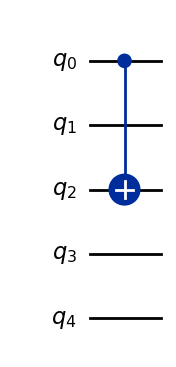

In [2]:

from qiskit.circuit.library.generalized_gates import LinearFunction
qc = QuantumCircuit(5)

qc.cx(0,2)

qc.draw(output = 'mpl')

Noisy Synthesis


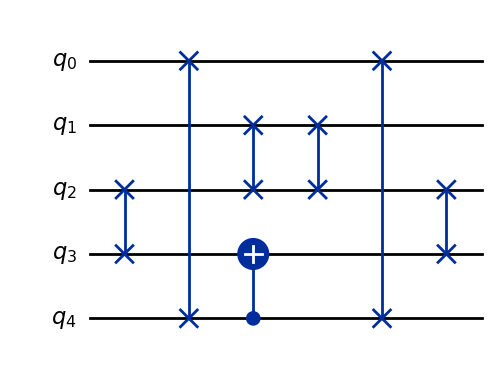

In [7]:
#Make sure to edit and add noise on 0,1 edge and rebuild 

print('Noisy Synthesis')
qc_lf_output = noisy_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)

Noiseless Synthesis


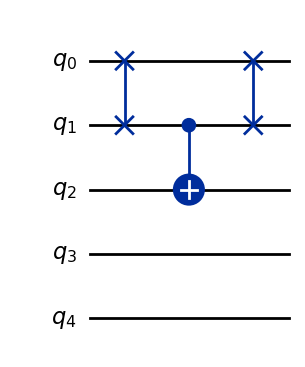

In [8]:
print('Noiseless Synthesis')
qc_lf_output = noiseless_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)